In [1]:
%matplotlib inline
from graph import *
from kernel import *
import traceback
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt
db = Database()

/home/leo/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#db_lab, db_nolab = db.gen_database_test(10, 10, 3, 4)
ker=Kernel(0.05,k=100)
#db.loaded = True
#db.export_db(db_nolab,"no_sing.dat")
db_nolab = db.import_db("no_sing.dat")


In [3]:
raw = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.raw_kernel)
inv = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.inv_kernel)
syl = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel)
con = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.conj_grad_kernel)
fix = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.fixed_point_kernel)
spe = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.spec_decomp_kernel)

In [95]:
diff1 = ker.scale_and_compare(raw,inv)
diff2 = ker.scale_and_compare(raw,syl)
diff3 = ker.scale_and_compare(raw,con)
diff4 = ker.scale_and_compare(raw,fix)
diff5 = ker.scale_and_compare(raw,spe)

diff6 = ker.scale_and_compare(inv,syl)
diff7 = ker.scale_and_compare(inv,con)
diff8 = ker.scale_and_compare(inv,fix)
diff9 = ker.scale_and_compare(inv,spe)

diff10 = ker.scale_and_compare(syl,con)
diff11 = ker.scale_and_compare(syl,fix)
diff12 = ker.scale_and_compare(syl,spe)

diff13 = ker.scale_and_compare(con,fix)
diff14 = ker.scale_and_compare(con,spe)

diff15 = ker.scale_and_compare(fix,spe)
print(diff1,diff2,diff3,diff4,diff5)
print(diff6,diff7,diff8,diff9)
print(diff10,diff11,diff12)
print(diff13,diff14)
print(diff15)

0.0001287023442854907 0.00033069295463953463 0.0001393861926249931 0.0006297184751106586 0.0001207667056552077
0.0004240787931457677 1.6610897718770372e-05 0.0006826194975561821 0.0001759955029156616
0.000429936288383269 0.000431163793202989 0.00025590608897030137
0.0006784180028957083 0.0001788982493899204
0.0005271089667425104


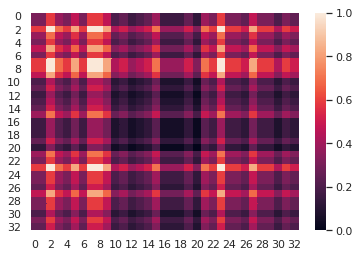

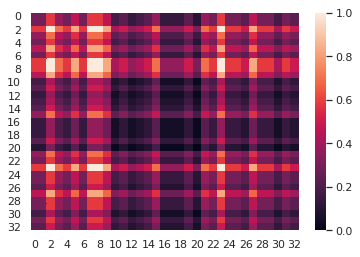

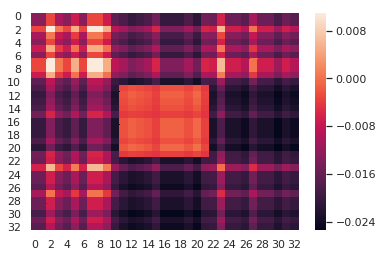

In [102]:
plt.clf()
sns.heatmap(raw)
plt.figure()
sns.heatmap(fix)
plt.figure()
sns.heatmap(fix-raw)

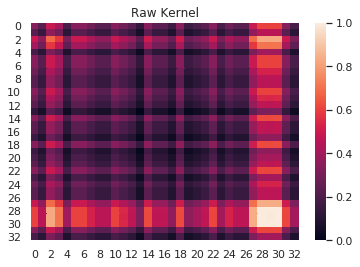

In [9]:
plt.clf()
plt.title("Raw Kernel")
sns.heatmap(raw)

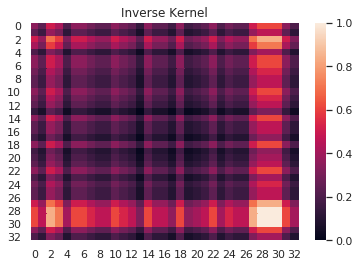

In [10]:
plt.clf()
plt.title("Inverse Kernel")
sns.heatmap(inv)

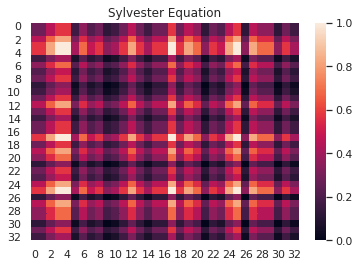

In [5]:
plt.clf()
plt.title("Sylvester Equation")
sns.heatmap(syl)

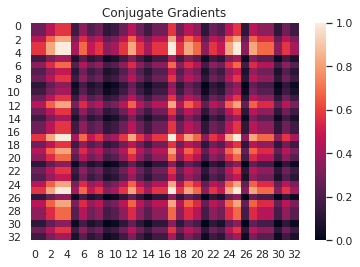

In [27]:
plt.clf()
plt.title("Conjugate Gradients")
sns.heatmap(con)

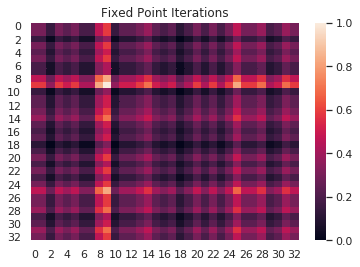

In [4]:
plt.clf()
plt.title("Fixed Point Iterations")
sns.heatmap(fix)

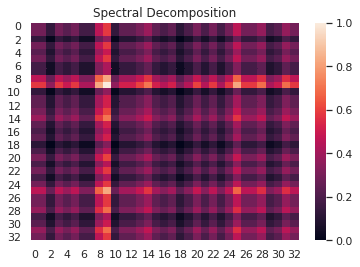

In [5]:
plt.clf()
plt.title("Spectral Decomposition")
sns.heatmap(spe)

In [ ]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [ ]:
dbA.shape

## All graphs
Star

In [ ]:
G = db.gen_graph("star",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"star",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Ring

In [ ]:
G = db.gen_graph("ring",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"ring",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Tree

In [ ]:
G = db.gen_graph("tree",9,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"tree",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

# Product graph

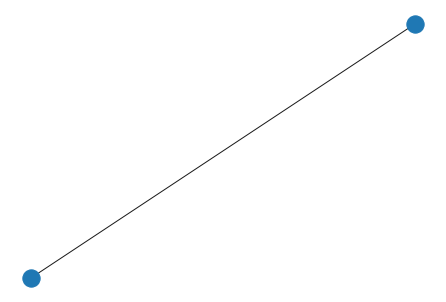

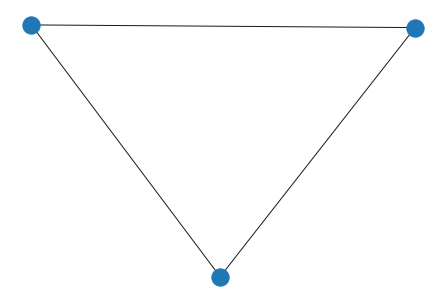

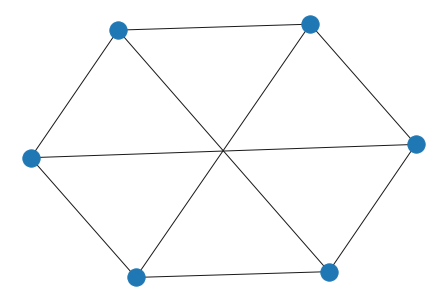

In [43]:
G = db.gen_graph("star",1,1)
G2 = db.gen_graph("ring",3,1)
nx.draw(G)
plt.figure()
nx.draw(G2)
W,_ = db.product_graph(G,G2)
plt.figure()
nx.draw(W)

# Points fixes : faire varier lambda et montrer différence temps de convergence & verifier si lambda plus haut donne de meilleur accuracy

In [35]:
xs = []
scores = []
times = []
N = 50
for x in range(1,N):
    if(x%(N/10)==0):
        print(100*x/N,"%")
    try :
        s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel",k=50)
        dic = s.cross_val_score(k=3)
        scores.append(dic["accuracy"]*100)
        xs.append(x/N)
        times.append(dic["time"])
    except Exception as e:
        print(e)
        break

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


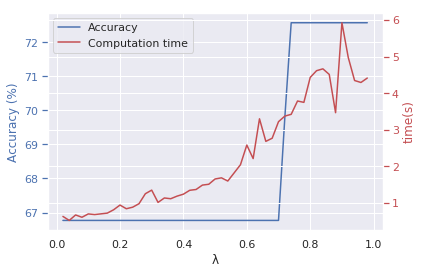

In [36]:
fig, ax1 = plt.subplots()
l1, = ax1.plot(xs, scores, label="Accuracy", color="b")
ax1.set_xlabel('λ')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Accuracy (%)', color="b")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2, = ax2.plot(xs,times,label="Computation time", color='r')
ax2.set_ylabel('time(s)', color='r')
ax2.tick_params('y', colors='r')
lines = [l1,l2]
ax1.legend(lines, [l.get_label() for l in lines])

# nb iter conj grad

In [9]:
xs = []
scores = []
times = []
var = []
N = 50
for x in range(1,N,5):
    if(x%(N/10)==0):
        print(100*x/N,"%")
    try :
        #moyenne
        t = 0
        for _ in range(40):
            s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.5, kernel="conj_grad_kernel", k=x)
            dic = s.cross_val_score(k=3)
            t+= dic["time"]
        t /= 3
        scores.append(dic["accuracy"]*100)
        var.append(dic["stddev"])
        xs.append(x)
        times.append(t)
    except Exception as e:
        print(e)
        traceback.print_exc()
        break

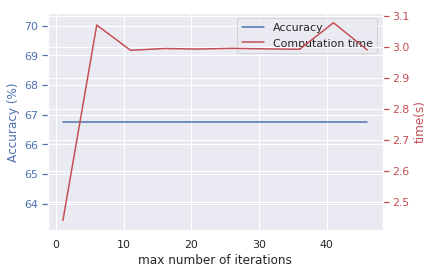

In [10]:
fig, ax1 = plt.subplots()
l1, = ax1.plot(xs, scores, label="Accuracy", color="b")
ax1.set_xlabel('max number of iterations')
ax1.set_ylabel('Accuracy (%)', color="b")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2, = ax2.plot(xs,times,label="Computation time", color='r')
ax2.set_ylabel('time(s)', color='r')
ax2.tick_params('y', colors='r')
lines = [l1,l2]
ax1.legend(lines, [l.get_label() for l in lines])

# Computation time and accuracy for different kernels VARIATION ON LAMBDA

In [3]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"])
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"])
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    dic=s.cross_val_score(3)
    t_syl.append(dic["time"])
    a_syl.append(dic["accuracy"])
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    dic=s.cross_val_score(3)
    t_conj.append(dic["time"])
    a_conj.append(dic["accuracy"])
    #spec
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    dic=s.cross_val_score(3)
    t_spec.append(dic["time"])
    a_spec.append(dic["accuracy"])
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
    dic=s.cross_val_score(3)
    t_fix.append(dic["time"])
    a_fix.append(dic["accuracy"])

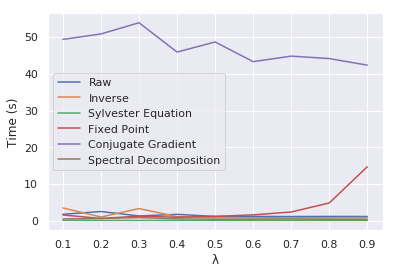

In [10]:
plt.figure()
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs,t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.xlabel('λ')
plt.ylabel('Time (s)')
plt.legend()

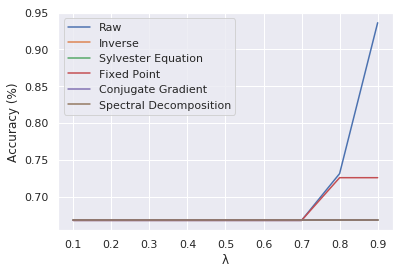

In [11]:
plt.figure()
plt.plot(xs,a_raw,label="Raw")
plt.plot(xs,a_inv,label="Inverse")
plt.plot(xs,a_syl,label="Sylvester Equation")
plt.plot(xs,a_fix,label="Fixed Point")
plt.plot(xs,a_conj,label="Conjugate Gradient")
plt.plot(xs,a_spec,label="Spectral Decomposition")
plt.xlabel('λ')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

# Computation time for different kernels VARIATION ON NB OF GRAPHS

In [54]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 10
np.random.seed(23)
for x in range(1,N):
    db_lab, db_nolab = db.gen_database_test(13*x, 10, 3, 4)
    print("_____",49*x+3," graphs_____________")
    xs.append(49*x+3)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="raw_kernel")
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"]*100)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"]*100)
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
    dic=s.cross_val_score(3)
    t_syl.append(dic["time"])
    a_syl.append(dic["accuracy"]*100)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=20)
    dic=s.cross_val_score(3)
    t_conj.append(dic["time"])
    a_conj.append(dic["accuracy"]*100)
    #spec
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
    dic=s.cross_val_score(3)
    t_spec.append(dic["time"])
    a_spec.append(dic["accuracy"]*100)
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel",k=20)
    dic=s.cross_val_score(3)
    t_fix.append(dic["time"])
    a_fix.append(dic["accuracy"]*100)

_____ 52  graphs_____________
_____ 101  graphs_____________
_____ 150  graphs_____________
_____ 199  graphs_____________
_____ 248  graphs_____________
_____ 297  graphs_____________
_____ 346  graphs_____________
_____ 395  graphs_____________
_____ 444  graphs_____________


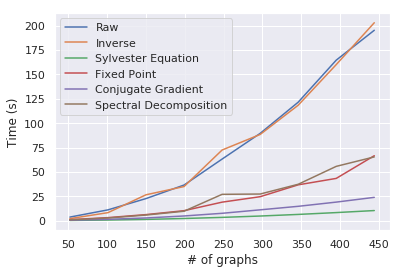

In [55]:
#plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs,t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.xlabel('# of graphs')
plt.ylabel('Time (s)')
plt.legend()

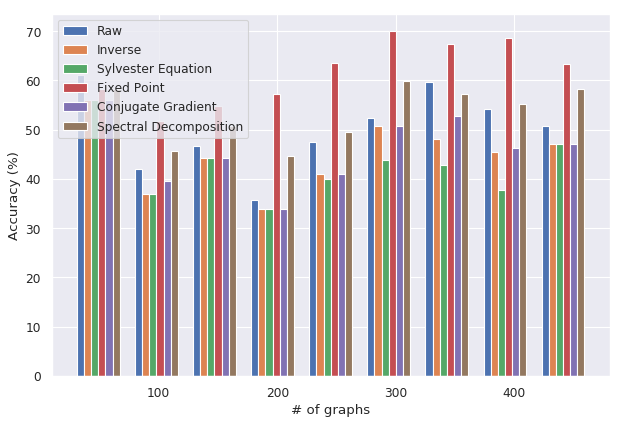

In [56]:
#print(a_raw)
plt.figure(num=None, figsize=(9,6), dpi=80, facecolor='w', edgecolor='k')
width=6
plt.bar(np.array(xs)-3*width,a_raw,label="Raw",width=width)
plt.bar(np.array(xs)-2*width,a_inv,label="Inverse",width=width)
plt.bar(np.array(xs)-1*width,a_syl,label="Sylvester Equation",width=width)
plt.bar(np.array(xs),a_fix,label="Fixed Point",width=width)
plt.bar(np.array(xs)+1*width,a_conj,label="Conjugate Gradient",width=width)
plt.bar(np.array(xs)+2*width,a_spec,label="Spectral Decomposition",width=width)
plt.xlabel('# of graphs')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

# same on nodes

In [57]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 50
np.random.seed(23)
for x in range(5,N,5):
    _, db_nolab = db.gen_database_test(5, x, 3, 3)
    print("_____",x," nodes_____________")
    xs.append(x)
    #raw
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="raw_kernel")
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"]*100)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="inv_kernel")
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"]*100)
    #syl
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
    dic=s.cross_val_score(3)
    t_syl.append(dic["time"])
    a_syl.append(dic["accuracy"]*100)
    #conj
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=10)
    dic=s.cross_val_score(3)
    t_conj.append(dic["time"])
    a_conj.append(dic["accuracy"]*100)
    #spec
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
    dic=s.cross_val_score(3)
    t_spec.append(dic["time"])
    a_spec.append(dic["accuracy"]*100)
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel",k=10)
    dic=s.cross_val_score(3)
    t_fix.append(dic["time"])
    a_fix.append(dic["accuracy"]*100)

_____ 5  nodes_____________
_____ 10  nodes_____________
_____ 15  nodes_____________
_____ 20  nodes_____________
_____ 25  nodes_____________
_____ 30  nodes_____________
_____ 35  nodes_____________
_____ 40  nodes_____________
_____ 45  nodes_____________


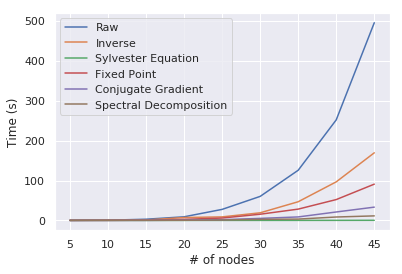

In [60]:
#plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs,t_raw,label="Raw")
plt.plot(xs,t_inv,label="Inverse")
plt.plot(xs,t_syl,label="Sylvester Equation")
plt.plot(xs,t_fix,label="Fixed Point")
plt.plot(xs,t_conj,label="Conjugate Gradient")
plt.plot(xs,t_spec,label="Spectral Decomposition")
plt.xlabel('# of nodes')
plt.ylabel('Time (s)')
plt.legend()

[61.111111111111114, 55.55555555555555, 38.888888888888886, 83.33333333333334, 66.66666666666666, 83.33333333333334, 94.44444444444446, 88.8888888888889, 88.8888888888889]


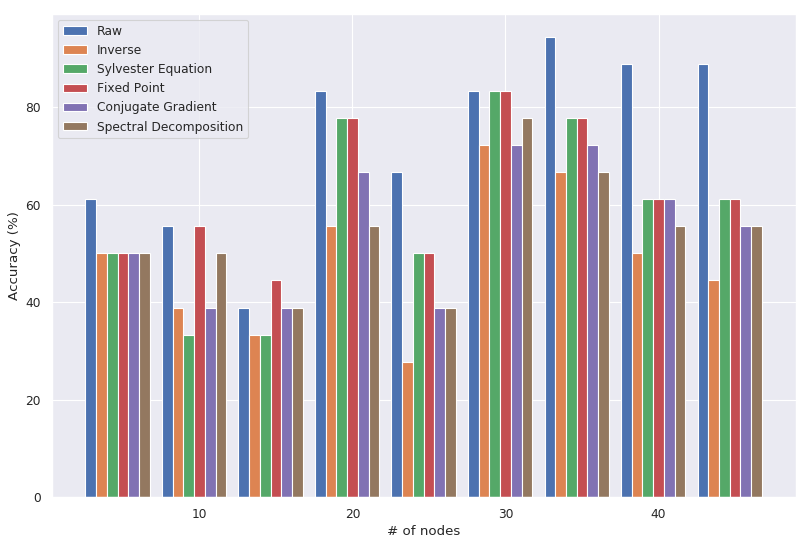

In [59]:
print(a_raw)
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
width=0.7
plt.bar(np.array(xs)-3*width,a_raw,label="Raw",width=width)
plt.bar(np.array(xs)-2*width,a_inv,label="Inverse",width=width)
plt.bar(np.array(xs)-1*width,a_syl,label="Sylvester Equation",width=width)
plt.bar(np.array(xs),a_fix,label="Fixed Point",width=width)
plt.bar(np.array(xs)+1*width,a_conj,label="Conjugate Gradient",width=width)
plt.bar(np.array(xs)+2*width,a_spec,label="Spectral Decomposition",width=width)
plt.xlabel('# of nodes')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

# label vs no label

In [42]:
xs = []
t_lab = []
t_nolab = []
a_lab = []
a_nolab = []
N = 10
for x in range(1,N):
    db_lab, db_nolab = db.gen_database_test(5*x, 10, 3, 4)
    xs.append(15*x+3)
    #inv
    s = SVM(db=db_nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
    dic=s.cross_val_score(3)
    t_nolab.append(dic["time"])
    a_nolab.append(dic["accuracy"]*100)
    #inv
    s = SVM(db=db_lab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
    dic=s.cross_val_score(3)
    t_lab.append(dic["time"])
    a_lab.append(dic["accuracy"]*100)

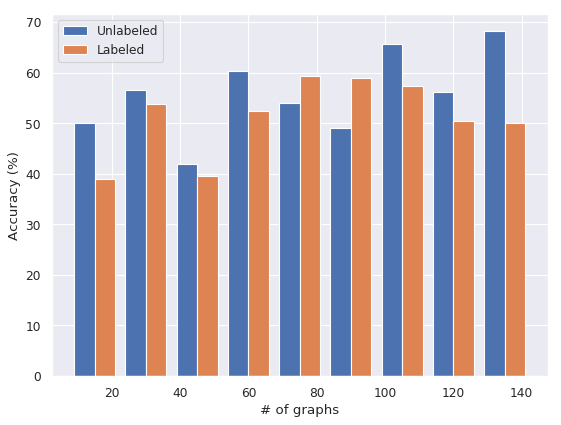

In [45]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
width=6
plt.bar(np.array(xs)-width,a_nolab,label="Unlabeled",width=width)
plt.bar(np.array(xs),a_lab,label="Labeled",width=width)
plt.xlabel('# of graphs')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()

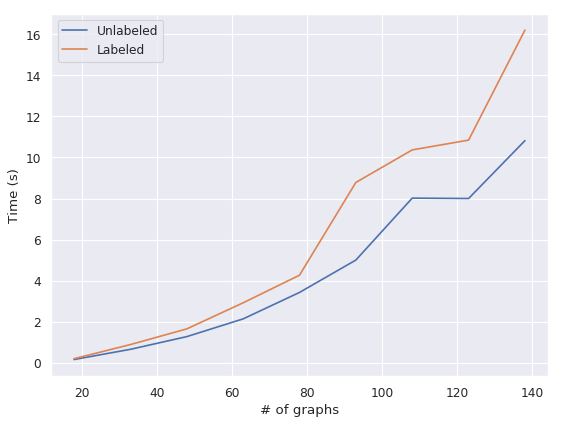

In [46]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.array(xs),t_nolab,label="Unlabeled")
plt.plot(np.array(xs),t_lab,label="Labeled")
plt.xlabel('# of graphs')
plt.ylabel('Time (s)')
plt.tick_params('y')
plt.legend()

# Load enzymes and proteins

In [2]:
lab, nolab = db.load_db("ENZYMES")

Loading  ENZYMES
600


In [3]:
nolab.shape

(600, 2)

In [4]:
print(np.unique(nolab[:,1]))
print(nolab[:,1].shape)

['1' '2' '3' '4' '5' '6']
(600,)


In [8]:
s = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
dic=s.cross_val_score(3)

In [10]:
s2 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=10)
dic2=s2.cross_val_score(3)

In [ ]:
s3 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
dic3=s3.cross_val_score(3)

In [ ]:
s4 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
dic4=s4.cross_val_score(3)

In [ ]:
print(dic)
print(dic2)
print(dic3)
print(dic4)

In [ ]:
dic

In [15]:
lab, nolab = db.load_db("MUTAG")

Loading  MUTAG
188


In [ ]:
s5 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="sylv_eq_kernel")
dic5=s5.cross_val_score(3)

In [ ]:
s6 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=100)
dic6=s6.cross_val_score(3)

In [ ]:
s7 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="fixed_point_kernel")
dic7=s7.cross_val_score(3)

In [ ]:
s8 = SVM(db=nolab, ratio_split=0.7, lbd=0.05, kernel="spec_decomp_kernel")
dic8=s8.cross_val_score(3)

In [20]:
xs = []
scores = []
times = []
scores_nkp = []
times_nkp = []
N = 20
for x in range(1,N):
    if(x%(N/10)==0):
        print(100*x/N,"%")
    s = SVM(db=nolab, ratio_split=0.7, lbd=0.7, kernel="sylv_eq_kernel", C=x/100)
    dic = s.cross_val_score(k=5)
    scores.append(dic["accuracy"]*100)
    xs.append(x/100)
    times.append(dic["time"])

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


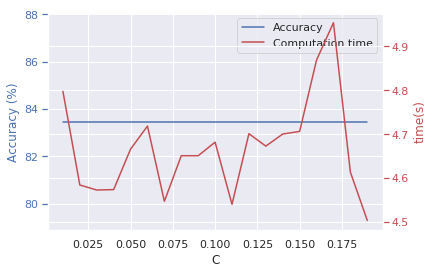

In [21]:
fig, ax1 = plt.subplots()
l1, = ax1.plot(xs, scores, label="Accuracy", color="b")
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy (%)', color="b")
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
l2, = ax2.plot(xs,times,label="Computation time", color='r')
ax2.set_ylabel('time(s)', color='r')
ax2.tick_params('y', colors='r')
lines = [l1,l2]
ax1.legend(lines, [l.get_label() for l in lines])

In [25]:
from scipy.sparse.linalg import svds
def NearestKroneckerProduct( A, SizeB, SizeC, Hermitian=False): 
    m = A.shape[0];
    n = A.shape[1];
    m1 = SizeB[0];
    n1 = SizeB[1];
    m2 = SizeC[0];
    n2 = SizeC[1];

    assert m == m1 * m2
    assert n == n1 * n2
    
    if Hermitian:
        assert m1 == n1
        assert m2 == n2
        A = 0.5 * ( A + A.T)
    
    R = A.reshape((m2, m1, n2, n1))
    R = np.transpose(R, (1, 3, 0, 2))
    R = R.reshape((m1*n1, m2*n2))
    #R = reshape( permute( reshape( A, [ m2, m1, n2, n1 ] ), [ 2 4 1 3 ] ), m1 * n1, m2 * n2 );
    
    B, S, C  =  svds(R,1)
    
    SqrtS = np.sqrt(np.asscalar(S))
    
    B = (B * SqrtS).reshape((m1, n1))
    C = (C * SqrtS).reshape((m2, n2))
    
    if Hermitian:
        B = 0.5 * ( B + B.T)
        C = 0.5 * ( C + C.T)
        
        if np.all(np.diag( B ) < 0) and np.all(np.diag( C ) < 0):
            B = -B
            C = -C
    
    D = A - np.kron(B,C)
    if Hermitian:
        D = 0.5 * ( D + D.T)
    return B, C, D

In [7]:
import networkx as nx
x1 = nx.to_numpy_matrix(db.gen_graph("star",2,1))
x2 = nx.to_numpy_matrix(db.gen_graph("ring",3,1))

In [8]:
w = np.asarray(np.kron(x1,x2))
w.shape

(9, 9)

In [14]:
B, C, D = ker.nkp(w, x1.shape, x2.shape)

In [15]:
B.shape

(3, 3)

In [16]:
C.shape

(3, 3)

In [17]:
np.linalg.norm(D)

0.04938271604938271

In [18]:
B

array([[-6.14331874e-17,  9.03602004e-01,  9.03602004e-01],
       [ 9.03602004e-01,  0.00000000e+00,  9.03602004e-01],
       [ 9.03602004e-01,  9.03602004e-01,  0.00000000e+00]])

In [19]:
ker = Kernel(0.05)
print("Base",ker.sylv_eq_kernel(x1,x2))
print("Approx",ker.sylv_eq_kernel(B,C))

Base 0.019220208676551342
Approx 0.019319639030161657


In [20]:
s1 = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel)
s2 = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel, nkp=True)

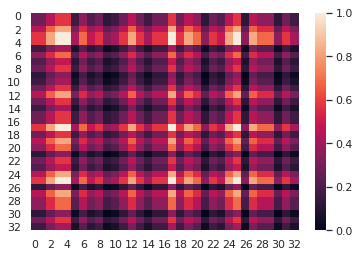

In [21]:
sns.heatmap(s1)

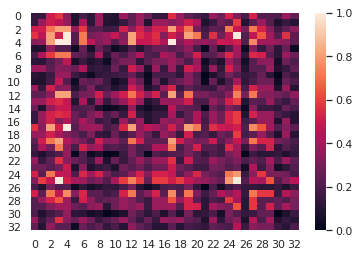

In [22]:
sns.heatmap(s2)

In [6]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
a_raw = []
a_inv = []
a_syl = []
a_fix = []
a_conj = []
a_spec = []
N = 7
np.random.seed(23)
for x in range(1,N):
    db_lab, db_nolab = db.gen_database_test(13*x, 15, 3, 4)
    print("_____",49*x+3," graphs_____________")
    xs.append(49*x+3)
    #raw
    s = SVM(db=db_lab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel",k=10)
    dic=s.cross_val_score(3)
    t_raw.append(dic["time"])
    a_raw.append(dic["accuracy"]*100)
    #inv
    s = SVM(db=db_lab, ratio_split=0.7, lbd=0.05, kernel="conj_grad_kernel", nkp=True, k=10)
    dic=s.cross_val_score(3)
    t_inv.append(dic["time"])
    a_inv.append(dic["accuracy"]*100)

_____ 52  graphs_____________
_____ 101  graphs_____________
_____ 150  graphs_____________
_____ 199  graphs_____________
_____ 248  graphs_____________
_____ 297  graphs_____________


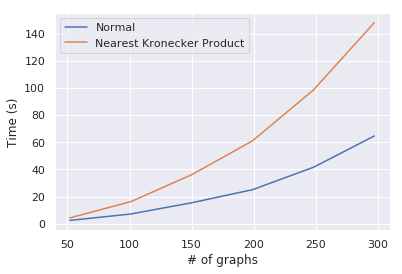

In [7]:
#plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs,t_raw,label="Normal")
plt.plot(xs,t_inv,label="Nearest Kronecker Product")
plt.xlabel('# of graphs')
plt.ylabel('Time (s)')
plt.legend()

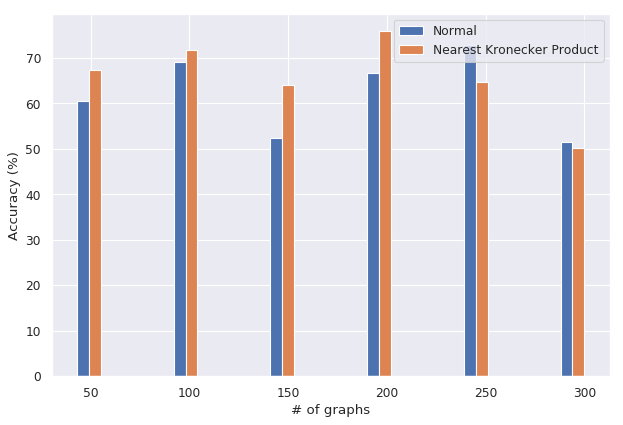

In [8]:
#print(a_raw)
plt.figure(num=None, figsize=(9,6), dpi=80, facecolor='w', edgecolor='k')
width=6
plt.bar(np.array(xs)-width,a_raw,label="Normal",width=width)
plt.bar(np.array(xs),a_inv,label="Nearest Kronecker Product",width=width)
plt.xlabel('# of graphs')
plt.ylabel('Accuracy (%)')
plt.tick_params('y')
plt.legend()